In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_csv(r"../data/imgt_I_domain_1_2.csv", index_col=0)
print(f'There are {len(df)} protein sequences.')
df.isnull().sum()

There are 13478 protein sequences.


allele_full_name            0
seq_len                     0
sequence                    0
locus                       0
domain_alpha1_2_sequence    0
pseudo_mhcflurry            0
pseudo_netmhcpan            0
dtype: int64

In [4]:
# extract protein info
protein_type = df["allele_full_name"].apply(lambda x: re.split('\W+', x)[1:4])
df[['code0', 'code1', 'code2']] = pd.DataFrame(list(protein_type), columns=['code0', 'code1', 'code2'])
df = df[['code0', 'code1', 'code2', 'domain_alpha1_2_sequence']]

<Axes: xlabel='protein_type', ylabel='number'>

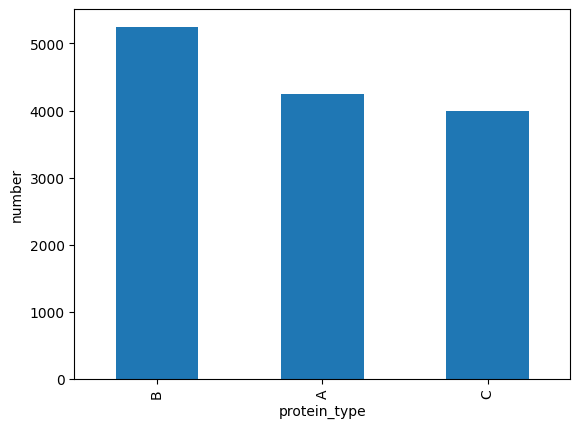

In [5]:
# distribution of code0
df["code0"].value_counts().plot(kind='bar',xlabel="protein_type", ylabel="number")

<Axes: xlabel='protein_type', ylabel='number'>

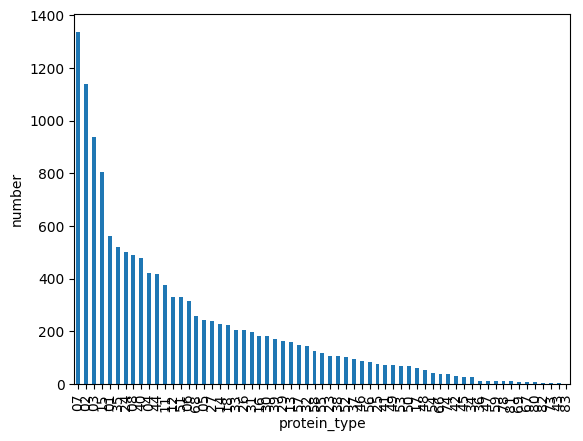

In [6]:
# distribution of code1
df["code1"].value_counts().plot(kind='bar',xlabel="protein_type", ylabel="number")

In [7]:
df["code2"].value_counts().sort_values()

999     1
858     1
832     1
831     1
826     1
       ..
05     62
03     64
06     65
04     66
02     66
Name: code2, Length: 1026, dtype: int64

In [8]:
types_code1 = len(df["code1"].unique())
print(f'Originally, there are {types_code1} types in code1')
occur_thr = 50 # occurence threshold
code1_counts = df["code1"].value_counts().sort_values()
num_minority = code1_counts[code1_counts < occur_thr].sum()
n_types = (df["code1"].value_counts().sort_values() > occur_thr-1).sum()
print(f'There are {num_minority} out of {len(df)} data points are rare cases (occurence under {occur_thr}) in code1')
print(f'There are {n_types+1} types left in code1 after combining the rare cases')

Originally, there are 63 types in code1
There are 287 out of 13478 data points are rare cases (occurence under 50) in code1
There are 46 types left in code1 after combining the rare cases


In [12]:
types_code2 = len(df["code2"].unique())
print(f'Originally, there are {types_code2} types in code2')
occur_thr = 20 # occurence threshold
code2_counts = df["code2"].value_counts().sort_values()
num_minority = code2_counts[code2_counts < occur_thr].sum()
n_types = (df["code2"].value_counts().sort_values() > occur_thr-1).sum()
print(f'There are {num_minority} out of {len(df)} data points are rare cases (occurence under {occur_thr}) in code2')
print(f'There are {n_types+1} types left in code2 after combining the rare cases')

Originally, there are 1026 types in code2
There are 4387 out of 13478 data points are rare cases (occurence under 20) in code2
There are 241 types left in code2 after combining the rare cases
